In [37]:
# dataset: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score


In [4]:
df =pd.read_csv('/content/Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


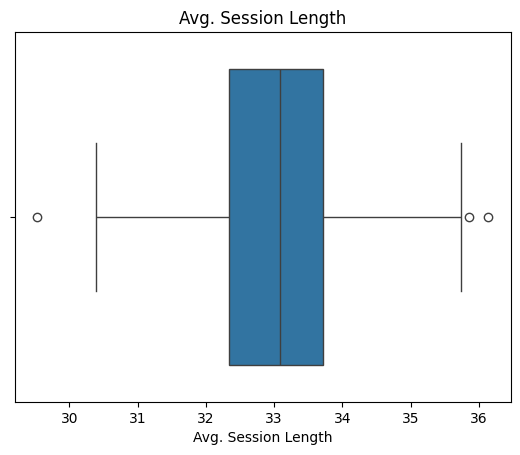

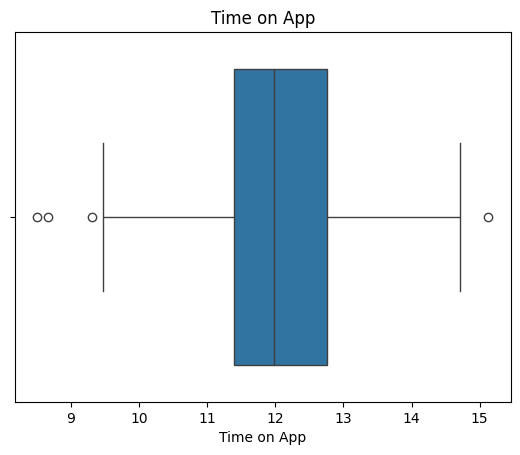

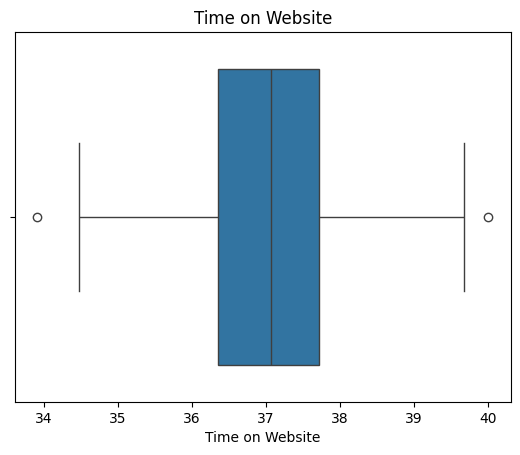

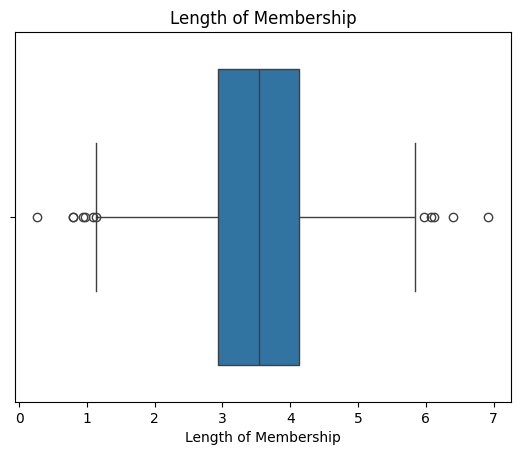

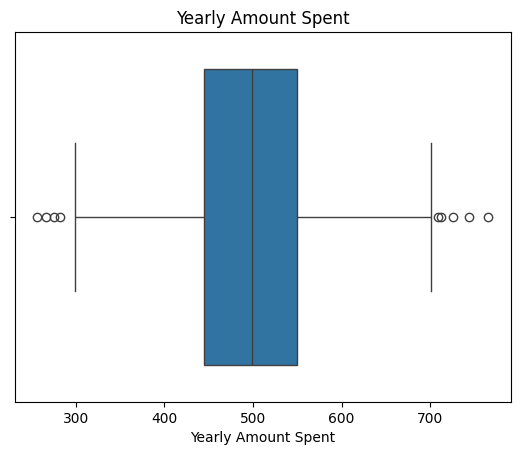

In [23]:
num_cols = [
    'Avg. Session Length',
    'Time on App',
    'Time on Website',
    'Length of Membership',
    'Yearly Amount Spent'
]

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

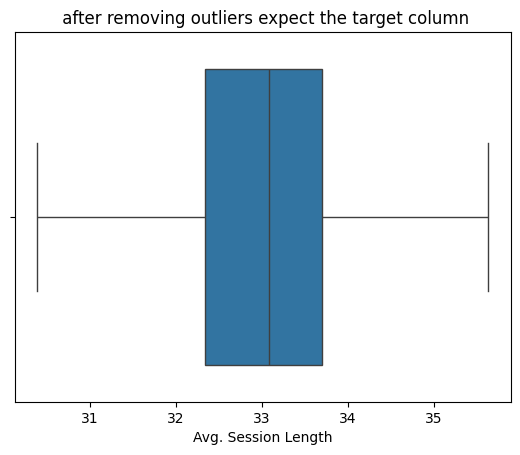

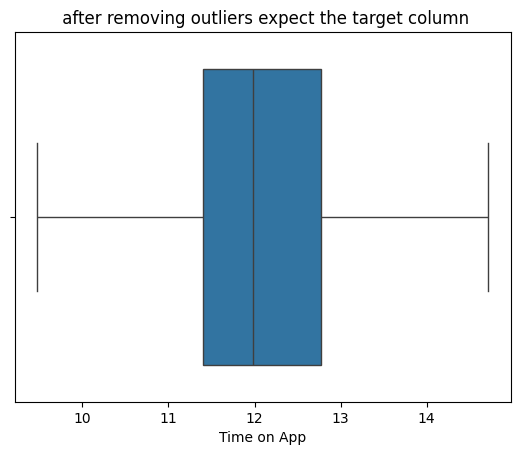

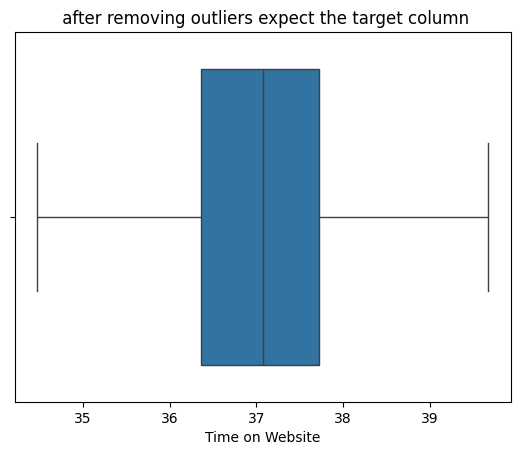

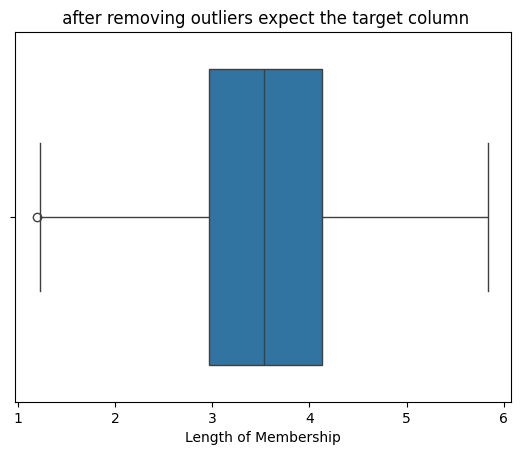

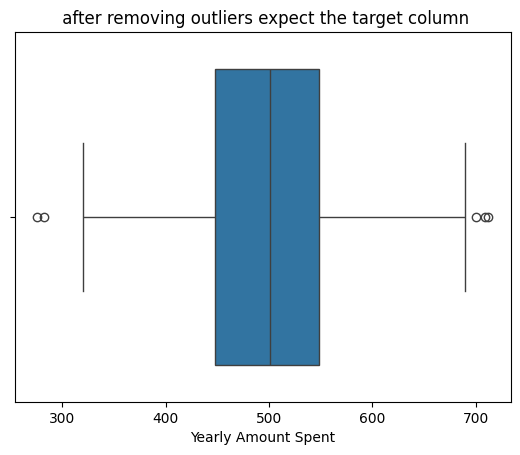

In [27]:
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
df_clean = df.copy()
for col in features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df_clean[col])
    plt.title(" after removing outliers expect the target column")
    plt.show()

In [9]:
#EDA


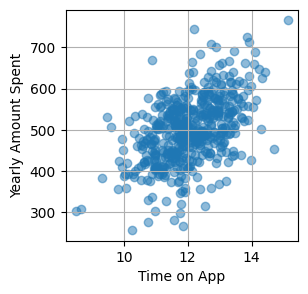

In [28]:
plt.figure(figsize=(3,3))
plt.scatter(df['Time on App'],df['Yearly Amount Spent'],alpha=0.5)
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()


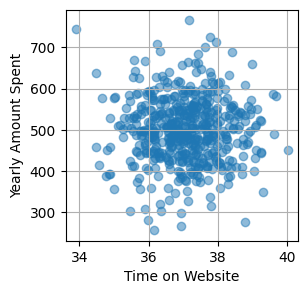

In [29]:
plt.figure(figsize=(3,3))
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'],alpha=0.5)
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()


In [30]:
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']


In [31]:
x_train , x_test ,y_train , y_test =train_test_split (x,y,test_size=0.3 ,random_state=42)

In [32]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [33]:
x_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,32.077590,10.347877,39.045156,3.434560
73,32.808698,12.817113,37.031539,3.851579
374,31.447446,10.101632,38.043453,4.238296
155,32.449522,13.457725,37.238806,2.941411
104,31.389585,10.994224,38.074452,3.428860
...,...,...,...,...
266,34.555283,11.777772,37.979827,3.784273
23,32.903251,11.657576,36.772604,3.919302
222,34.334865,11.109456,38.585855,3.892891
261,32.550527,13.041245,36.655208,3.456234


In [34]:
from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [35]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [36]:
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['coef'])
print(cdf)

                           coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [37]:
predection= lm.predict(x_test)
predection

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'evaluation of lm')

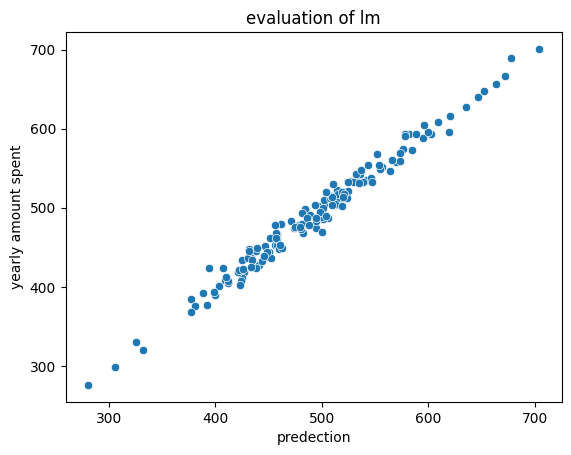

In [38]:
sns.scatterplot(  x=predection,  y=y_test)
plt.xlabel("predection")
plt.ylabel("yearly amount spent")
plt.title("evaluation of lm")

In [39]:
print("mean absolute error:",mean_absolute_error(y_test,predection))
print("mean squared error:",mean_squared_error(y_test,predection))


mean absolute error: 8.426091641432116
mean squared error: 103.91554136503333


In [40]:
r2 = r2_score(y_test, predection)
print("r2",r2)

r2 0.9808757641125855
